### 분류와 회귀 중 회귀에 관련된 문제 => 자전거 대여량 "예측"


In [55]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from scipy import stats 
import matplotlib.font_manager as fm
# NoteBook 안에 그래프를 위해(?)
%matplotlib inline 

#  그래프에서 격자로 숫자 범위가 잘 띄게
plt.style.use('ggplot')

In [56]:
#  parse_dates 를 datetime 으로 하면 datetime 식으로 불러온다... 아직 무슨말인지 잘 모르겠음
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
train.shape


(10886, 12)

In [57]:
# train.info()
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [58]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [59]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [60]:
# msno.matrix(train,figsize=(12,5))

In [61]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape

#  Datetime 으로 되어있는 데이터를 연-원-일-시간으로 Column을 만들어서 다시 담기

(10886, 18)

In [62]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'Hours')]

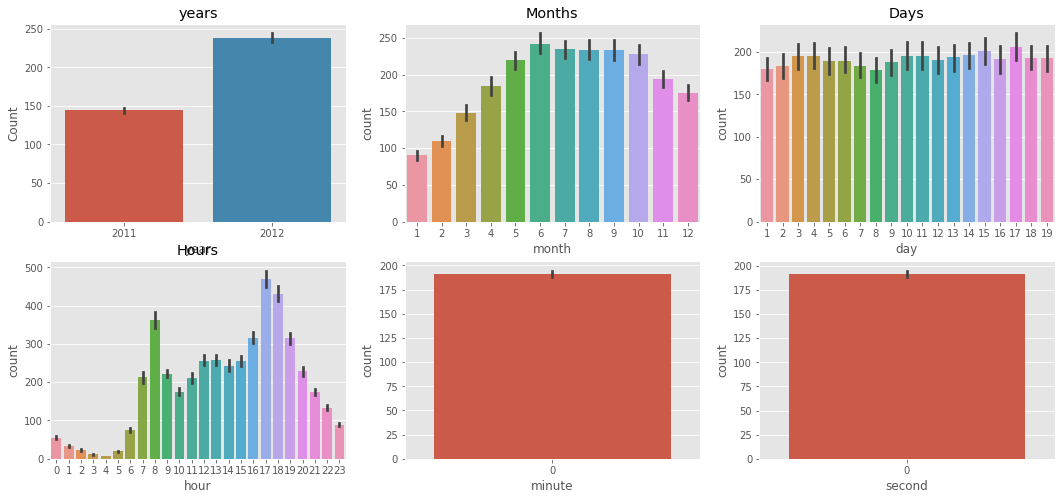

In [66]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title='years')
ax2.set(xlabel='month',title='Months')
ax3.set(xlabel='day',title='Days')
ax4.set(xlabel='hour',title='Hours')

* 연도별 대여량은 증가했음
* days data 가 1~19까지만 있으므로 feature로 사용해선 안됨.


[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Working Day ')]

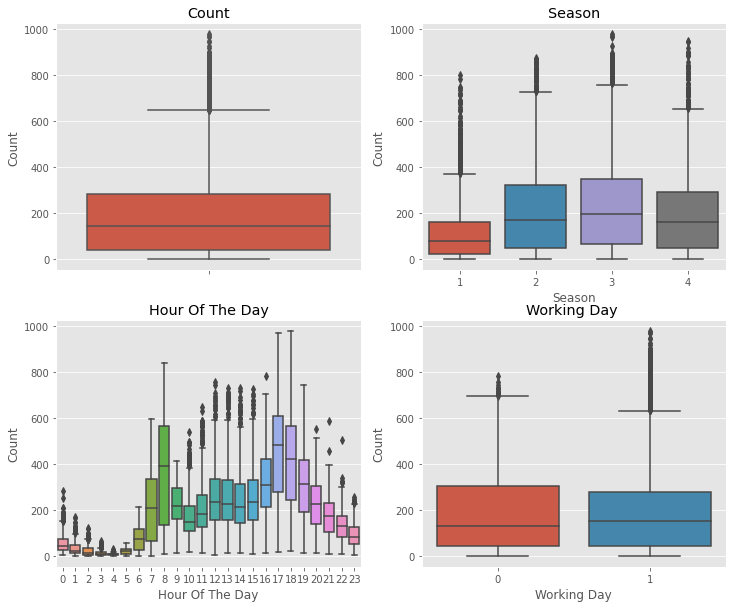

In [67]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Working Day ")

* 나머지 데이터는 위와 비슷하고, 눈여겨 볼 것은 Working day 에서 쉬는 날 대여량이 소폭 증가한다는 사실...


In [68]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [69]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

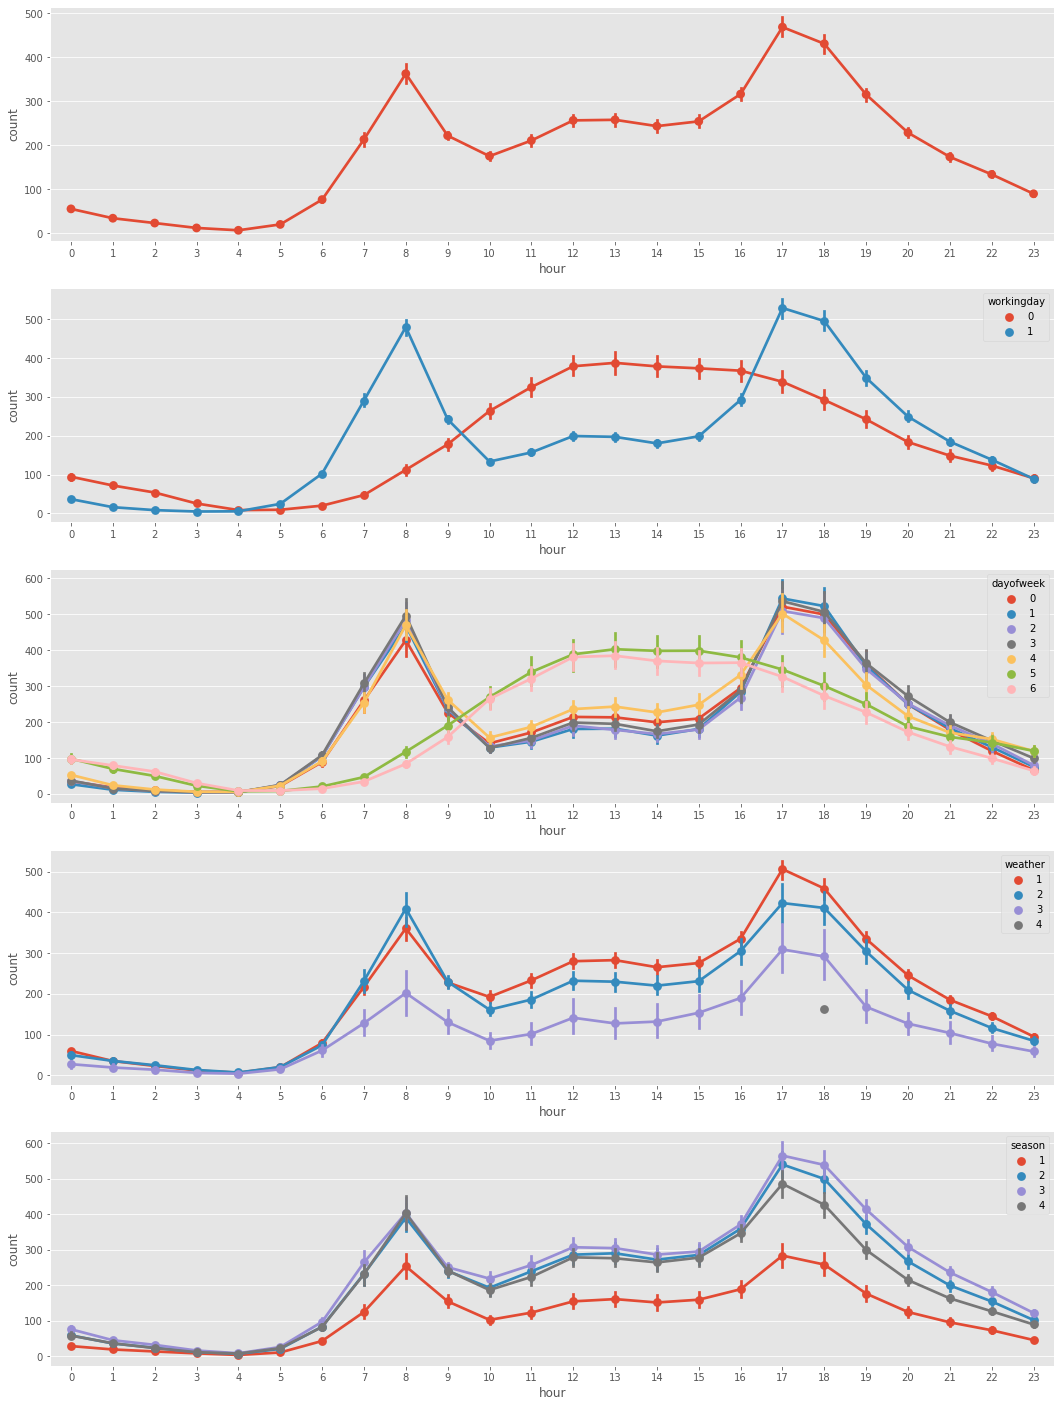

In [70]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)
# 시간대별
sns.pointplot(data=train, x="hour", y="count", ax=ax1)
# 근무일 별 0:휴일 1:근무일
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)
# 요일별 0:월요일 6:일요일
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

* 온도, 풍속, 등록여부, 습도, 대여량 등의 각각의 상관관계 확인


In [ ]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False